Предметная область: образ жизни студентов  
Источник данных: https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset  
Характер данных: Реальные  

Атрибуты датасета:
- Student_ID (int64)
- Study_Hours_Per_Day (float64)
- Extracurricular_Hours_Per_Day (Часы внеучебной деятельнсти) (float64)
- Sleep_Hours_Per_Day (float64)
- Social_Hours_Per_Day (float64)
- Physical_Activity_Hours_Per_Day (float64)
- Stress_Level (object)
- GPA (Средний балл) (float64)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'data/raw/student_lifestyle_dataset.csv')
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


Для дальнейшего анализа данных нам не нужен ID студента, а также нужно привести столбец Stress_Level к числовым значениям.

In [2]:
df = df.drop(columns=['Student_ID'])
mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Stress_Level'] = df['Stress_Level'].map(mapping)
print(f'Ключ значение для Stress_Level: {mapping}')

df

Ключ значение для Stress_Level: {'Low': 0, 'Moderate': 1, 'High': 2}


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,1
1,5.3,3.5,8.0,4.2,3.0,2.75,0
2,5.1,3.9,9.2,1.2,4.6,2.67,0
3,6.5,2.1,7.2,1.7,6.5,2.88,1
4,8.1,0.6,6.5,2.2,6.6,3.51,2
...,...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,3.32,1
1996,6.3,2.8,8.8,1.5,4.6,2.65,1
1997,6.2,0.0,6.2,0.8,10.8,3.14,1
1998,8.1,0.7,7.6,3.5,4.1,3.04,2


Выведем различные общие показатели для атрибутов датасета

In [3]:
df.describe(include='all')

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960,1.366000
std,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674,0.727536
min,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000,0.000000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000,1.000000
50%,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000,2.000000
75%,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000,2.000000
max,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000,2.000000


Построим гистограммы распределения значений

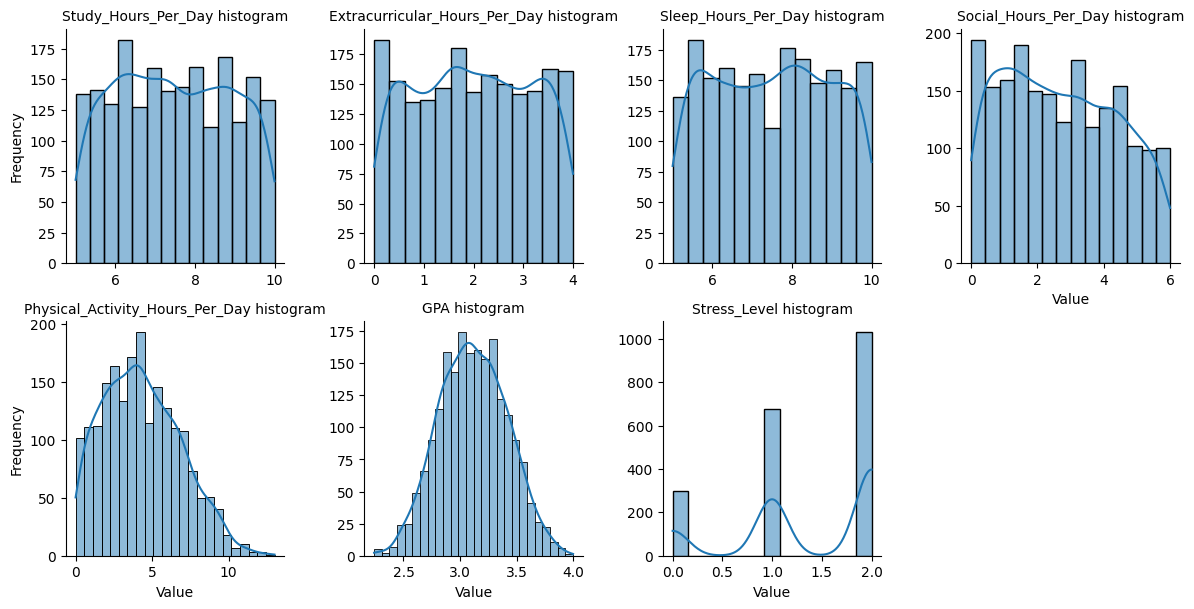

In [4]:
def plot_hist(data, **kwargs):
    sns.histplot(data=data, kde=True, **kwargs)

g = sns.FacetGrid(pd.melt(df), col='variable', col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(plot_hist)
g.set_titles('{col_name} histogram')
g.set_axis_labels('Value', 'Frequency')

Определим наличие выбросов

<Axes: >

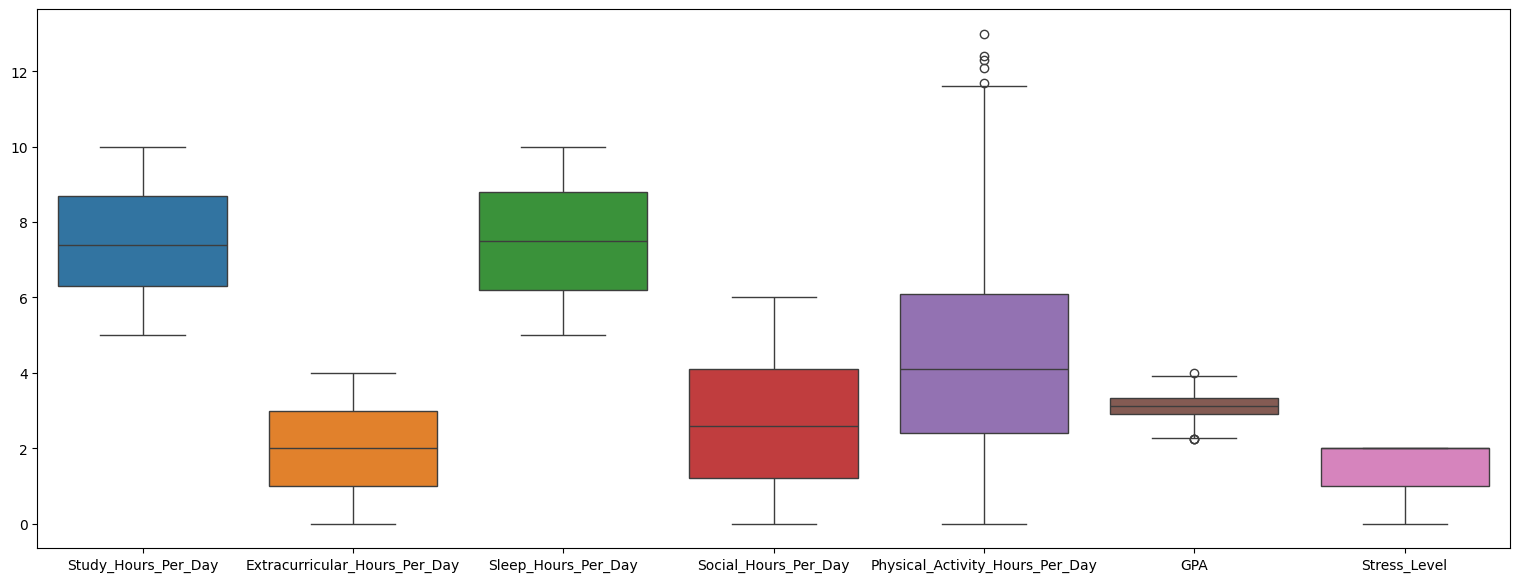

In [5]:
plt.figure(figsize=(19, 7))
sns.boxplot(data=df)

На графиках видно, что есть небольшие выбросы в атрибутах Physical_Activity_Hours_Per_Day и GPA.  
Пропущенных значений в датасете не обнаружено.

Построим корреляционную матрицу

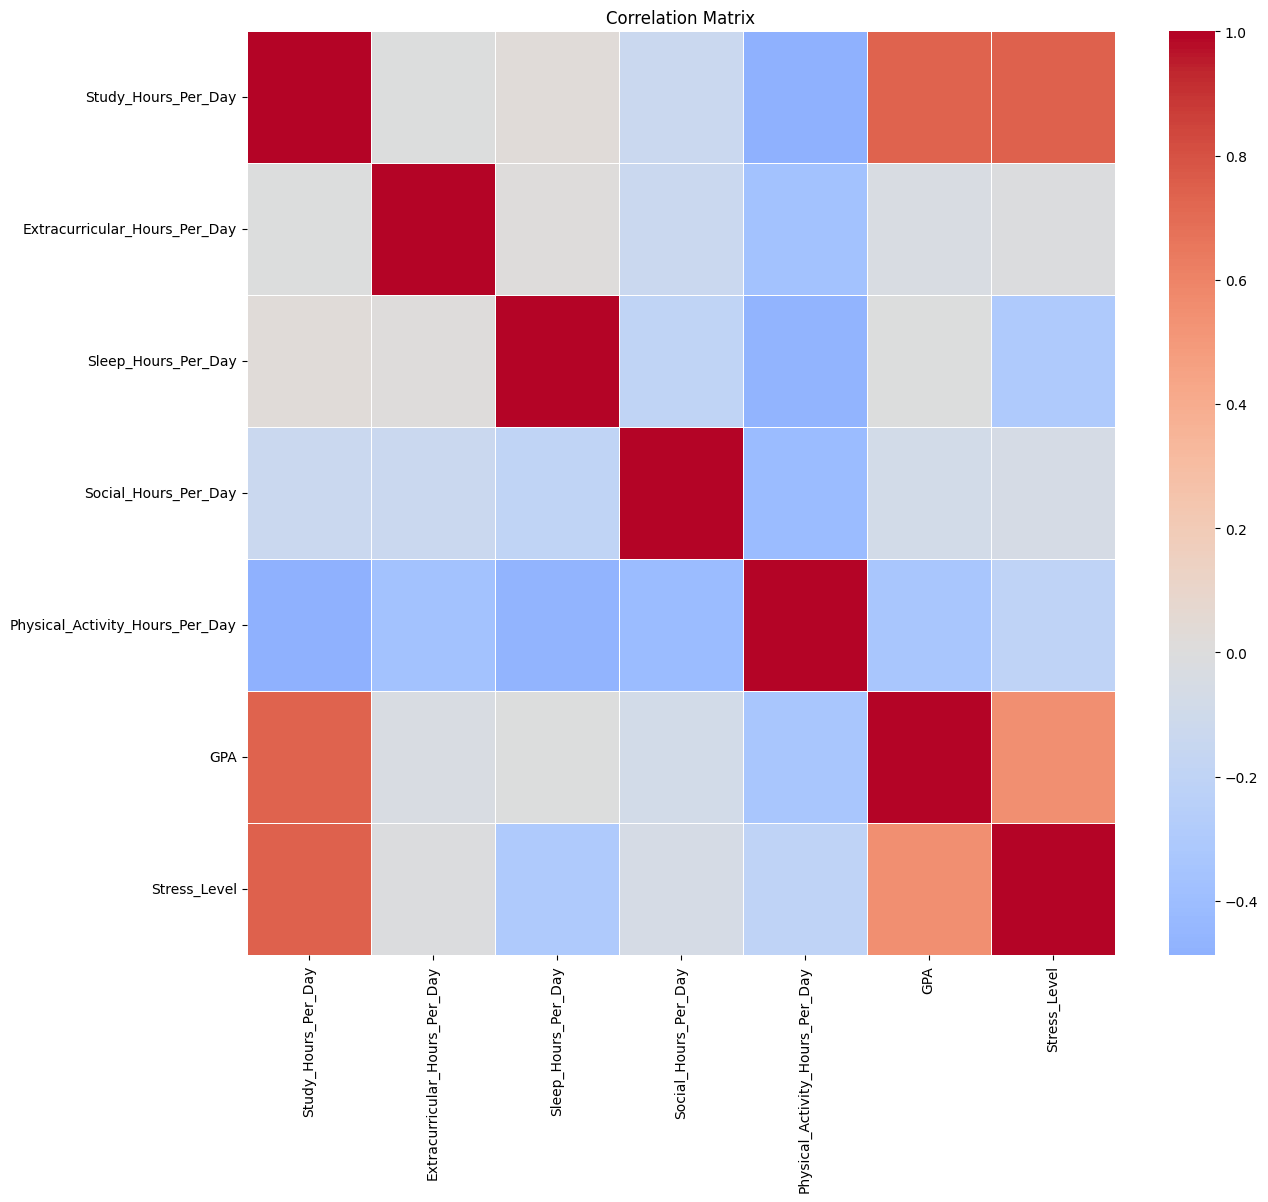

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
Study_Hours_Per_Day,1.000000,-0.002629,0.026717,-0.137820,-0.488113,0.734468,0.738843
Extracurricular_Hours_Per_Day,-0.002629,1.000000,0.008844,-0.139081,-0.369989,-0.032174,-0.006099
Sleep_Hours_Per_Day,0.026717,0.008844,1.000000,-0.193556,-0.470302,-0.004278,-0.298917
Social_Hours_Per_Day,-0.137820,-0.139081,-0.193556,1.000000,-0.417142,-0.085677,-0.054702
Physical_Activity_Hours_Per_Day,-0.488113,-0.369989,-0.470302,-0.417142,1.000000,-0.341152,-0.205207
GPA,0.734468,-0.032174,-0.004278,-0.085677,-0.341152,1.000000,0.550395
Stress_Level,0.738843,-0.006099,-0.298917,-0.054702,-0.205207,0.550395,1.000000


In [6]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
corr_matrix

Из корреляционной матрицы можно сделать выводы:
- Сильная положительная корреляция между GPA и Study_Hours_Per_Day (0.734)
- Умеренная отрицательная корреляция между Physical_Activity_Hours_Per_Day и Study_Hours_Per_Day (-0.488)
- Сильная положительная корреляция между Stress_Level и Study_Hours_Per_Day (0.739)
- Умеренная отрицательная корреляция между Physical_Activity_Hours_Per_Day и Extracurricular_Hours_Per_Day (-0.37)
- Умеренная отрицательная корреляция между Physical_Activity_Hours_Per_Day и Sleep_Hours_Per_Day (-0.47) 
- Умеренная отрицательная корреляция между Physical_Activity_Hours_Per_Day и Social_Hours_Per_Day (-0.417)
- Умеренная отрицательная корреляция между Physical_Activity_Hours_Per_Day и GPA (-0.341)
- Умеренная положительная корреляция между GPA и Stress_Level (-0.341)  

Между остальными атрибутами корреляция слабая или вовсе отсутствует

Построим матрицу графиков рассеивания

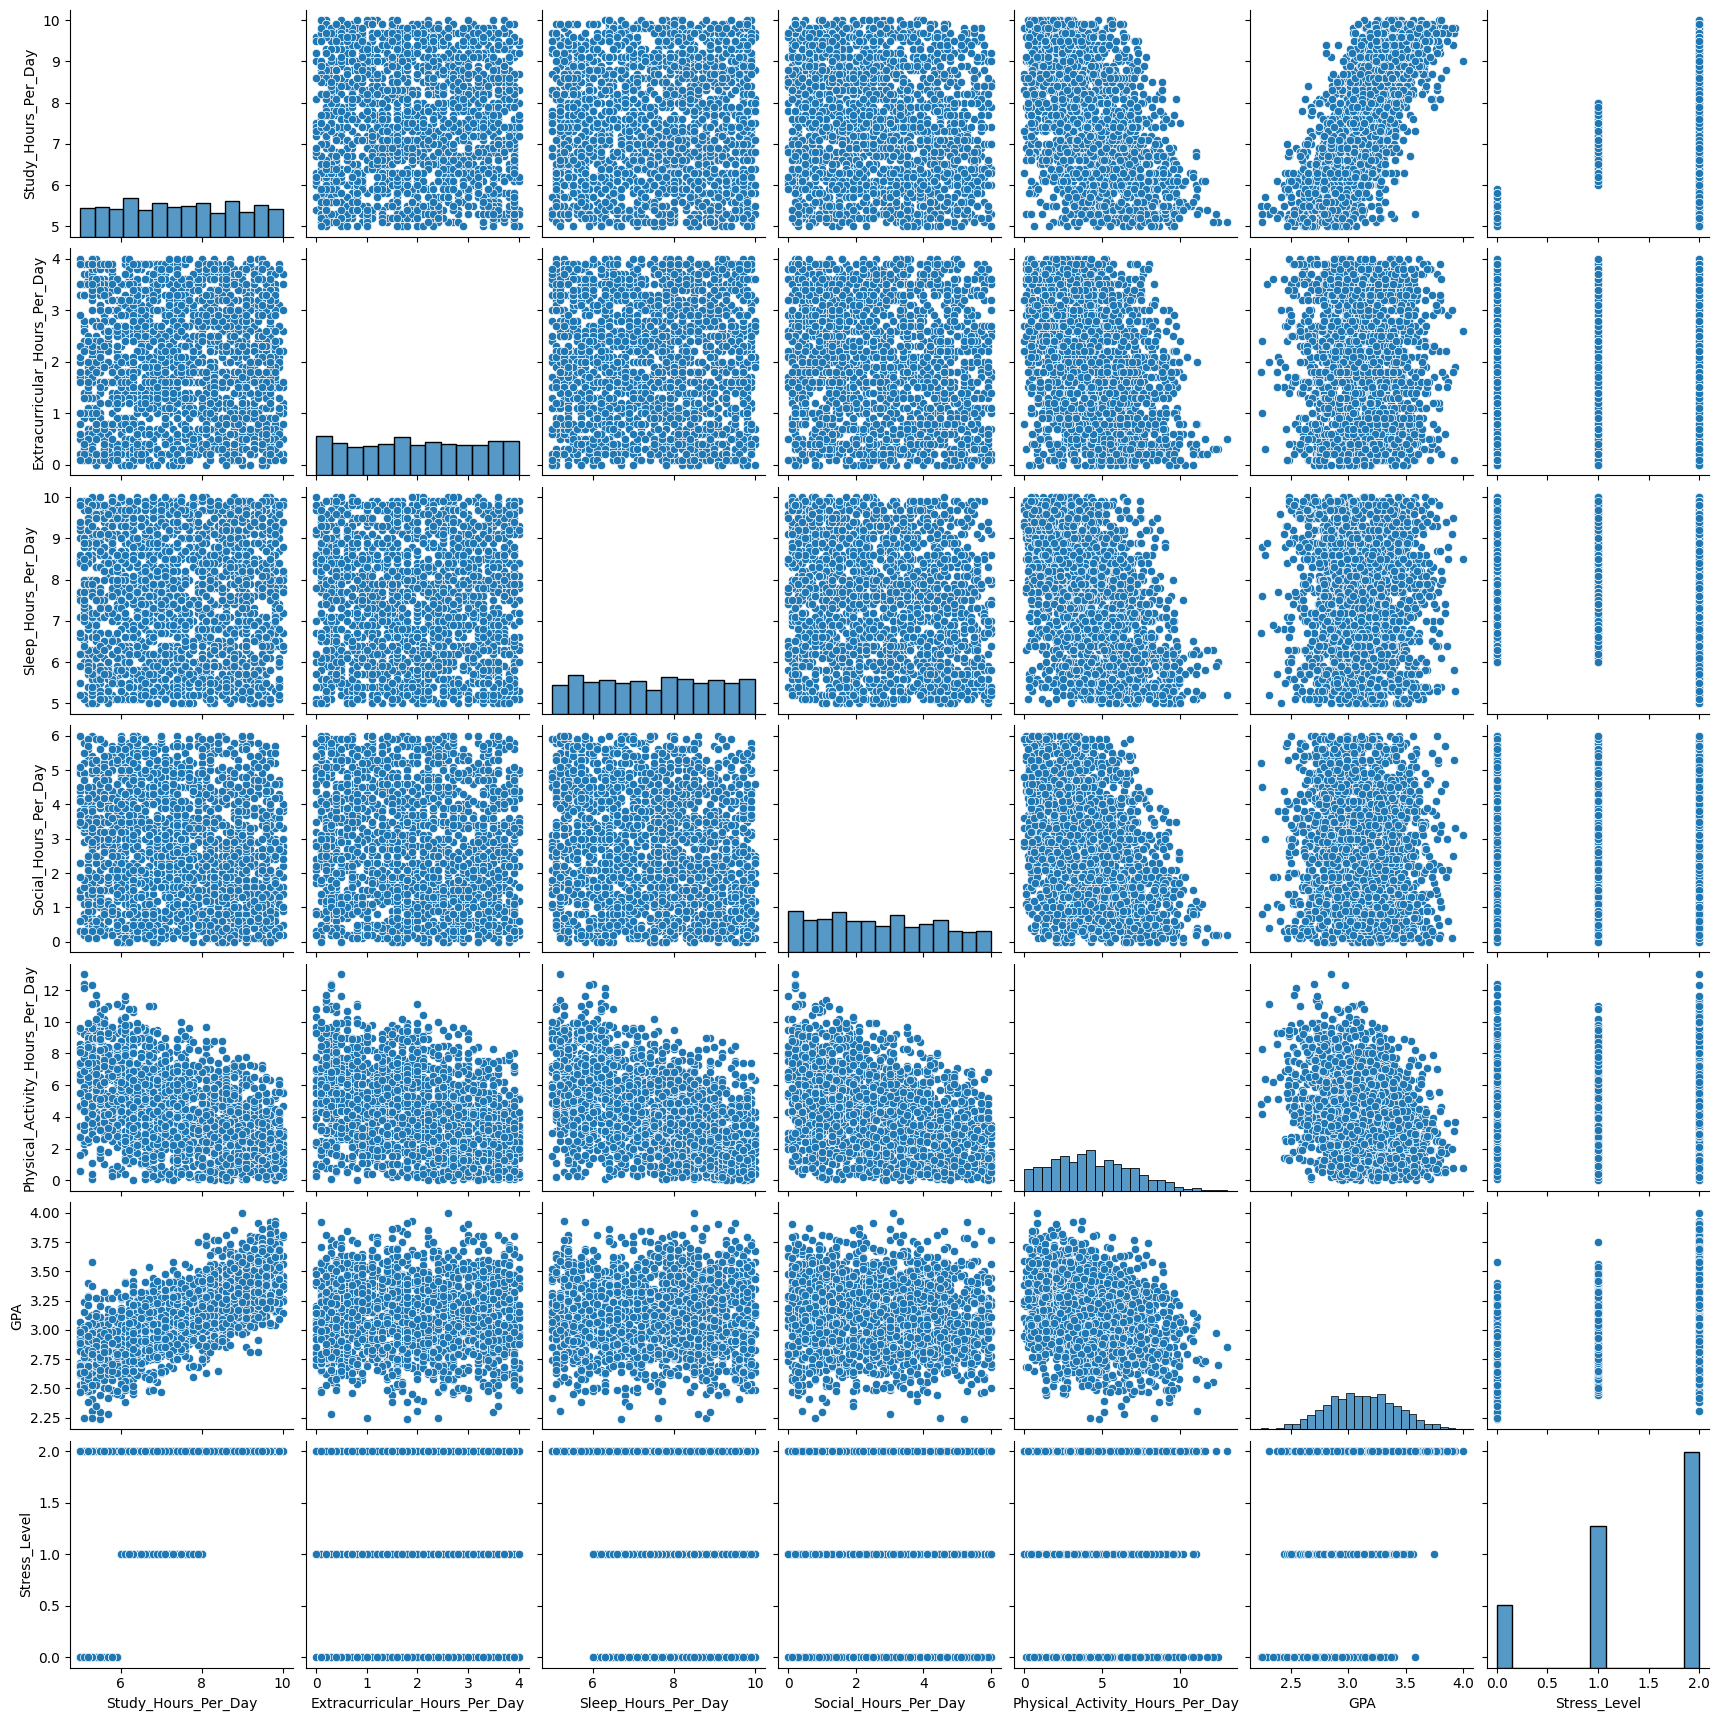

In [7]:
pplt = sns.pairplot(df)

Выводы:
1. Чем больше времени студент тратит на учебу, тем выше у  него оценки
2. Чем больше времени студент тратит на спорт, тем меньше времени он тратит на прочие времяпрепровождения
3. Чем больше студент учится, тем выше у него уровень стресса, не являющегося высоким.
4. Среди студентов с низким уровнем стресса нет отличников
5. Среди студентов, имеющих низкий и умеренный уровень стресса, нет людей, спящих намного меньше 6 часов.

In [8]:
# Сохраним датасет для дальнейшего использования.
df.to_csv(r'data/student_lifestyle_clean.csv', index=False)